In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [6]:
recording_base = Path('/scratch/mcg4aw/kombat_artifacts/recordings')
record_file = recording_base / 'test_results.csv'

In [15]:
records = pd.read_csv(record_file, index_col=0)

In [18]:
summary = records.groupby('agent').mean()

In [20]:
summary

,total_reward,agent_win,num_match_steps,fin_player_health,fin_opponent_health
agent,,,,,
skip_1,-2581.95,0.1,714.75,2.80,42.25
skip_2,-697.60,0.6,779.90,23.05,25.40


In [19]:
summary.to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n & total_reward & agent_win & num_match_steps & fin_player_health & fin_opponent_health \\\\\nagent &  &  &  &  &  \\\\\n\\midrule\nskip_1 & -2581.950000 & 0.100000 & 714.750000 & 2.800000 & 42.250000 \\\\\nskip_2 & -697.600000 & 0.600000 & 779.900000 & 23.050000 & 25.400000 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [16]:
records

,total_reward,agent_win,num_match_steps,fin_player_health,fin_opponent_health,agent
0,-434,0,820,0,21,skip_1
1,-285,0,766,0,17,skip_1
2,-7329,0,547,0,86,skip_1
3,-126,0,1089,0,11,skip_1
4,-1003,0,740,0,32,skip_1
5,-1422,0,882,0,38,skip_1
6,-7326,0,539,0,86,skip_1
7,-3091,0,748,0,56,skip_1
8,288,1,826,17,0,skip_1
9,-9925,0,408,0,100,skip_1


In [21]:
import matplotlib.pyplot as plt

In [26]:
train_res_dir = Path('/scratch/mcg4aw/AI-Kombatants/data/train_rewards')

In [39]:
paths =[f for f in train_res_dir.iterdir()]
agents = range(8)
skips = [1,2,1,2,2,2,1,1]
data = []
for f, a, s in zip(paths, agents, skips):
    df = pd.read_csv(f, index_col=False)
    df['trial_num'] = a
    df['n_skips']=s
    data = data + [df]

In [41]:
paths

[PosixPath('/scratch/mcg4aw/AI-Kombatants/data/train_rewards/skip_1_PPO_MKII_Single_Env_47196_00001_1_2025-12-12_19-40-09.csv'),
 PosixPath('/scratch/mcg4aw/AI-Kombatants/data/train_rewards/skip_2_PPO_MKII_Single_Env_ae94a_00002_2_2025-12-12_20-04-31.csv'),
 PosixPath('/scratch/mcg4aw/AI-Kombatants/data/train_rewards/skip_1_PPO_MKII_Single_Env_47196_00000_0_2025-12-12_19-40-09.csv'),
 PosixPath('/scratch/mcg4aw/AI-Kombatants/data/train_rewards/skip_2_PPO_MKII_Single_Env_ae94a_00003_3_2025-12-12_20-04-31.csv'),
 PosixPath('/scratch/mcg4aw/AI-Kombatants/data/train_rewards/skip_2_PPO_MKII_Single_Env_ae94a_00000_0_2025-12-12_20-04-31.csv'),
 PosixPath('/scratch/mcg4aw/AI-Kombatants/data/train_rewards/skip_2_PPO_MKII_Single_Env_ae94a_00001_1_2025-12-12_20-04-31.csv'),
 PosixPath('/scratch/mcg4aw/AI-Kombatants/data/train_rewards/skip_1_PPO_MKII_Single_Env_47196_00003_3_2025-12-12_19-40-09.csv'),
 PosixPath('/scratch/mcg4aw/AI-Kombatants/data/train_rewards/skip_1_PPO_MKII_Single_Env_47196_000

In [42]:
df = pd.concat(data)

In [43]:
df

,Wall time,Step,Value,trial_num,n_skips
0,1.765587e+09,1,-7064.368652,0,1
1,1.765587e+09,2,-4983.240234,0,1
2,1.765587e+09,3,-3790.239990,0,1
3,1.765587e+09,4,-3978.239990,0,1
4,1.765587e+09,5,-3375.600098,0,1
...,...,...,...,...,...
10,1.765587e+09,11,-4088.159912,7,1
11,1.765587e+09,12,-3204.840088,7,1
12,1.765587e+09,13,-2951.840088,7,1
13,1.765587e+09,14,-4185.120117,7,1


In [44]:
df.columns = ['wall_time','iteration', 'episode_reward_mean', 'trial_num', 'n_skips']

In [46]:
df = df.drop('wall_time', axis=1)

In [47]:
df

,iteration,episode_reward_mean,trial_num,n_skips
0,1,-7064.368652,0,1
1,2,-4983.240234,0,1
2,3,-3790.239990,0,1
3,4,-3978.239990,0,1
4,5,-3375.600098,0,1
...,...,...,...,...
10,11,-4088.159912,7,1
11,12,-3204.840088,7,1
12,13,-2951.840088,7,1
13,14,-4185.120117,7,1


In [48]:
import seaborn as sns

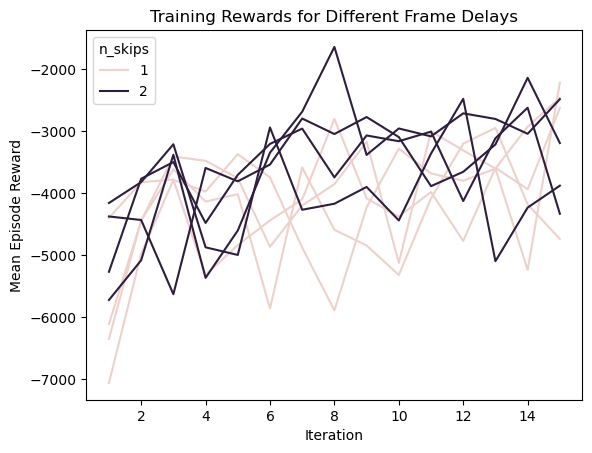

In [58]:
ax = sns.lineplot(df, x='iteration', y='episode_reward_mean', units = 'trial_num', hue = 'n_skips', estimator=None)
ax.set_xlabel('Iteration')
ax.set_ylabel('Mean Episode Reward')
ax.set_title('Training Rewards for Different Frame Delays')
plt.savefig('rewards.png')